In [1]:
path = 'quora_duplicate_questions.csv'

In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk import word_tokenize, Text
from textblob import TextBlob,Word
import spacy
import textacy
import re 
import pickle
from matplotlib import pyplot as plt

In [3]:
#taking first 1000 records
data = pd.read_csv(path,sep=',',encoding='utf-8')
data = data[:2500].fillna("empty")
data.head()


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
data['question1_token']=data['question1']
data['question2_token']=data['question2']

In [5]:
#tokenisation
for i in range(0,data.shape[0]):
    data['question1_token'][i]=word_tokenize(data['question1'][i])
    data['question2_token'][i]=word_tokenize(data['question2'][i])

/home/sr/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sr/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Data Cleaning

In [6]:
#removal of punctuations
for i in range(0,data.shape[0]):
    data['question1_token'][i] = [word for word in data['question1_token'][i] if word.isalpha()]
    data['question2_token'][i] = [word for word in data['question2_token'][i] if word.isalpha()]

/home/sr/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sr/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
#Tweaking stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words1=stop_words
pos_tagger=nltk.pos_tag(stop_words)
for value in pos_tagger:
    if value[1] in ['IN','WDT','WP','WRB']:
        stop_words1.remove(value[0])


In [8]:
#Removal of Stop words
for i in range(0,data.shape[0]):
    data['question1_token'][i] = [w for w in data['question1_token'][i] if not w in stop_words1]
    data['question2_token'][i] = [w for w in data['question2_token'][i] if not w in stop_words1]
data.head()

/home/sr/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sr/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,qid1,qid2,question1,question2,is_duplicate,question1_token,question2_token
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[What, step, by, step, guide, invest, in, shar...","[What, step, by, step, guide, invest, in, shar..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[What, story, of, Kohinoor, Diamond]","[What, would, happen, if, Indian, government, ..."
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[How, I, increase, speed, of, internet, connec...","[How, Internet, speed, increased, by, hacking,..."
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[Why, I, mentally, lonely, How, I, solve]","[Find, remainder, when, math, divided, by]"
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[Which, one, dissolve, in, water, quikly, suga...","[Which, fish, would, survive, in, salt, water]"


In [9]:
#Lemmatization
from nltk.stem import WordNetLemmatizer

In [10]:
lem = WordNetLemmatizer()

In [11]:
for i in range(0,data.shape[0]):
    data['question1_token'][i]=[lem.lemmatize(w,'v') for w in  data['question1_token'][i]]
    data['question2_token'][i]=[lem.lemmatize(w,'v') for w in  data['question2_token'][i]]

/home/sr/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sr/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
data.head(20)

,id,qid1,qid2,question1,question2,is_duplicate,question1_token,question2_token
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[What, step, by, step, guide, invest, in, shar...","[What, step, by, step, guide, invest, in, shar..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[What, story, of, Kohinoor, Diamond]","[What, would, happen, if, Indian, government, ..."
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[How, I, increase, speed, of, internet, connec...","[How, Internet, speed, increase, by, hack, thr..."
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[Why, I, mentally, lonely, How, I, solve]","[Find, remainder, when, math, divide, by]"
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[Which, one, dissolve, in, water, quikly, suga...","[Which, fish, would, survive, in, salt, water]"
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,"[Astrology, I, Capricorn, Sun, Cap, moon, cap,...","[I, triple, Capricorn, Sun, Moon, ascendant, i..."
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,"[Should, I, buy, tiago]","[What, keep, childern, active, far, from, phon..."
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,"[How, I, good, geologist]","[What, I, great, geologist]"
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,"[When, use, シ, instead, of, し]","[When, use, instead, of]"
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,"[Motorola, company, Can, I, hack, Charter, Mot...","[How, I, hack, Motorola, for, free, internet]"


# feature engineering

In [13]:
#diff in length of questions in square to penalize high diff
data['length_difference']=(data.question1.str.len()-data.question2.str.len())**2

In [14]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_token,question2_token,length_difference
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[What, step, by, step, guide, invest, in, shar...","[What, step, by, step, guide, invest, in, shar...",81
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[What, story, of, Kohinoor, Diamond]","[What, would, happen, if, Indian, government, ...",1369
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[How, I, increase, speed, of, internet, connec...","[How, Internet, speed, increase, by, hack, thr...",196
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[Why, I, mentally, lonely, How, I, solve]","[Find, remainder, when, math, divide, by]",225
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[Which, one, dissolve, in, water, quikly, suga...","[Which, fish, would, survive, in, salt, water]",1369


In [15]:
#matching first word and last word

data['last']=0

In [16]:
for i in range(0,data.shape[0]):       
    if data['question1_token'][i][-1] == data['question2_token'][i][-1]:
        data['last'][i]=1


/home/sr/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
data['concat']=data['question1_token']+data['question2_token']

In [18]:
import re, math
from collections import Counter

In [19]:
# WORD = re.compile(r'\w+')
def get_cosine(vec1, vec2):
     intersection = set(vec1.keys()) & set(vec2.keys())
     numerator = sum([vec1[x] * vec2[x] for x in intersection])

     sum1 = sum([vec1[x]**2 for x in vec1.keys()])
     sum2 = sum([vec2[x]**2 for x in vec2.keys()])
     denominator = math.sqrt(sum1) * math.sqrt(sum2)

     if not denominator:
        return 0.0
     else:
        return float(numerator) / denominator

In [20]:
data['cosine']=None
for i in range(0,data.shape[0]):
#     print data
    
    vector1=Counter(data['question1_token'][i])
    vector2=Counter(data['question2_token'][i])
    data['cosine'][i]=get_cosine(vector1, vector2)
data.head()

/home/sr/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,id,qid1,qid2,question1,question2,is_duplicate,question1_token,question2_token,length_difference,last,concat,cosine
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[What, step, by, step, guide, invest, in, shar...","[What, step, by, step, guide, invest, in, shar...",81,0,"[What, step, by, step, guide, invest, in, shar...",0.934199
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[What, story, of, Kohinoor, Diamond]","[What, would, happen, if, Indian, government, ...",1369,0,"[What, story, of, Kohinoor, Diamond, What, wou...",0.282843
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[How, I, increase, speed, of, internet, connec...","[How, Internet, speed, increase, by, hack, thr...",196,0,"[How, I, increase, speed, of, internet, connec...",0.33541
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[Why, I, mentally, lonely, How, I, solve]","[Find, remainder, when, math, divide, by]",225,0,"[Why, I, mentally, lonely, How, I, solve, Find...",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[Which, one, dissolve, in, water, quikly, suga...","[Which, fish, would, survive, in, salt, water]",1369,0,"[Which, one, dissolve, in, water, quikly, suga...",0.436436


In [23]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train['length_difference'] = robust_scaler.fit_transform(X_train['length_difference'].reshape(-1,1))


# X_train=data.loc[:,['cosine','last','length_difference']]
# y_train=data['is_duplicate']

/home/sr/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
print X_train.shape
print y_train.shape

(2500, 3)
(2500,)


In [25]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

GaussianNB(priors=None)

In [26]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print("")
ls = metrics.log_loss(y_train,nb_predict_train)
print ls

Accuracy: 0.6596

11.757226890336744


In [27]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.1, random_state=42)
lr_model.fit(X_train, y_train)
lr_predict_test = lr_model.predict(X_train)



# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_test)))
print("")
ls = metrics.log_loss(y_train,lr_predict_test)
print ls

Accuracy: 0.6912

10.66566050727088


1st max value of 10.666 occured at C=0.100


Text(0,0.5,u'recall score')

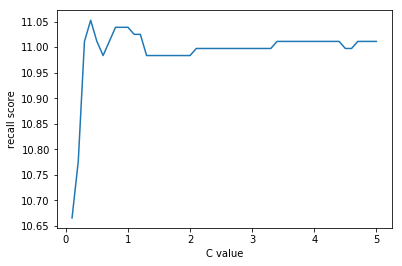

In [28]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 15
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train)
    lr_predict_loop_test = lr_model_loop.predict(X_train)
    recall_score = metrics.log_loss(y_train, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score < best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)      # Create random forest object
rf_model.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [30]:
rf_predict_test = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_test)))
print("")
ls = metrics.log_loss(y_train,rf_predict_test)
print ls

Accuracy: 0.9096

3.122340888225827
